In [41]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, skewnorm

In [42]:
ticker = input("Enter the ticker name: ")
ticker_id = yf.download(ticker, period="1y", interval="1d")
ticker_id = ticker_id["Close"] 

[*********************100%***********************]  1 of 1 completed


In [43]:
log_returns = np.log(ticker_id / ticker_id.shift(1)).dropna()

In [44]:
mean = log_returns.mean()
std_dev = log_returns.std()
skewness = skew(log_returns).item()

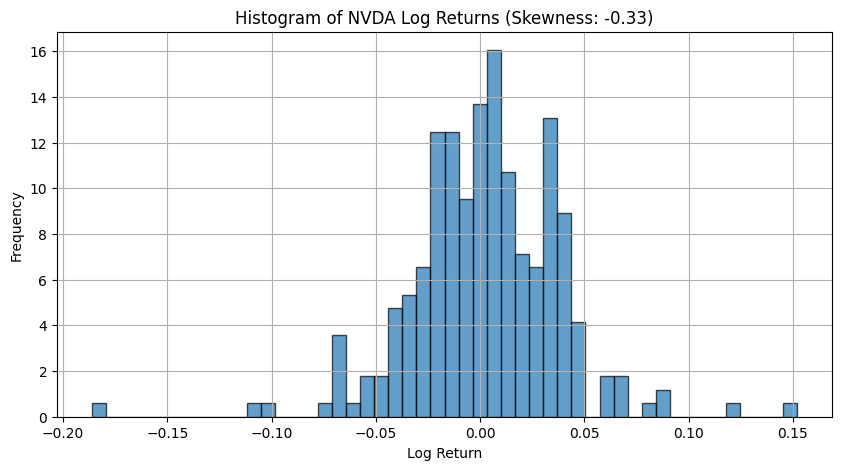

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(log_returns, bins=50, edgecolor="black", alpha=0.7, density=True)
plt.title(f"Histogram of {ticker} Log Returns (Skewness: {skewness:.2f})")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [46]:
num_simulations = 1000  
num_days = 252 
last_price = ticker_id.iloc[-1]  
mean = log_returns.mean()
std_dev = log_returns.std()

In [47]:
simulated_prices = np.zeros((num_days, num_simulations))
for sim in range(num_simulations):
    simulated_prices[0, sim] = last_price
    for day in range(1, num_days):
        skewed_random_return = skewnorm.rvs(a=skewness)  
        simulated_prices[day, sim] = simulated_prices[day - 1, sim] * np.exp(
            mean + std_dev * skewed_random_return
        )

/tmp/ipykernel_16228/2119085436.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  simulated_prices[0, sim] = last_price
/tmp/ipykernel_16228/2119085436.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  simulated_prices[day, sim] = simulated_prices[day - 1, sim] * np.exp(


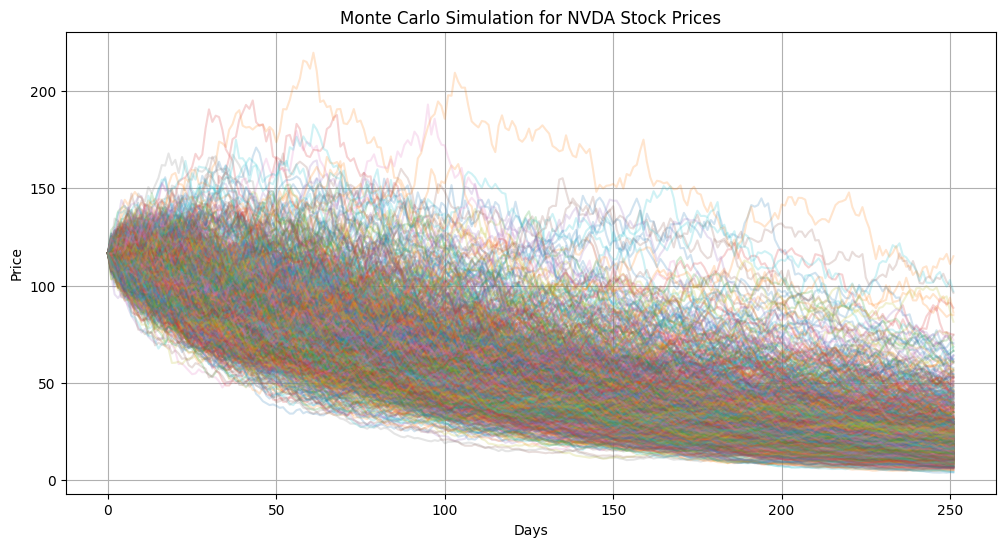

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(simulated_prices, alpha=0.2)
plt.title(f"Monte Carlo Simulation for {ticker} Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid()
plt.show()

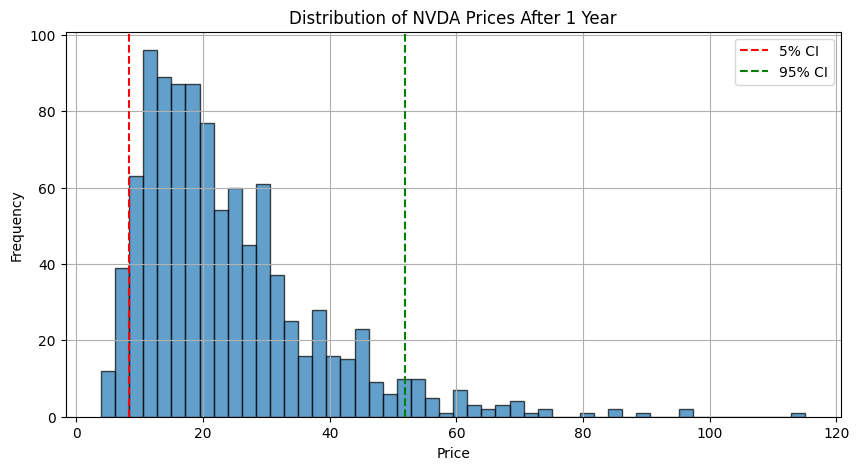

In [49]:
final_prices = simulated_prices[-1, :]
plt.figure(figsize=(10, 5))
plt.hist(final_prices, bins=50, edgecolor="black", alpha=0.7)
plt.axvline(np.percentile(final_prices, 5), color="r", linestyle="dashed", label="5% CI")
plt.axvline(np.percentile(final_prices, 95), color="g", linestyle="dashed", label="95% CI")
plt.title(f"Distribution of {ticker} Prices After 1 Year")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

In [50]:
conf_interval = np.percentile(final_prices, [5, 95])
print(f"95% Confidence Interval for {ticker} price after 1 year: {conf_interval}")

95% Confidence Interval for NVDA price after 1 year: [ 8.3346232  51.97267725]
